# Telco Customer Churn – Ensemble Modeling Task

In this task, we aim to build predictive models to classify whether a customer will churn (leave the service) or not, based on their demographics, service usage, and account information.

### 🎯 Objective:
To apply and compare multiple **ensemble learning techniques** to improve classification performance on the Telco Customer Churn dataset. The ensemble methods to be used include:
- **Bagging** (e.g., BaggingClassifier with Decision Trees)
- **Boosting** (e.g., XGBoost, AdaBoost)
- **Stacking** (e.g., combining multiple base models using a meta-learner)

We will also handle **class imbalance**, tune hyperparameters, and evaluate model performance using metrics such as:
- Accuracy
- Precision, Recall, F1-score
- Confusion Matrix
- ROC-AUC Curve  

***

## Importing Required Libraries

In this section, we import all the essential libraries needed for data manipulation, visualization, preprocessing, modeling, and evaluation.

### 🧰 Libraries Used:

- **Pandas / NumPy**: For data loading, manipulation, and numerical operations.
- **Matplotlib / Seaborn**: For data visualization and plotting.
- **Scikit-learn**: For preprocessing, model training (Logistic Regression, Decision Tree, SVM, KNN), model evaluation, and ensemble methods (Bagging, Stacking).
- **XGBoost**: For implementing gradient boosting models.
- **Imbalanced-learn (imblearn)**: To handle class imbalance using `RandomOverSampler`.
- **StandardScaler**: For feature scaling prior to model training.
- **Evaluation Metrics**: Accuracy, classification report, confusion matrix, ROC curve, AUC, precision-recall curve.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler

## Loading the Dataset and Initial Exploration

In this step, we load the **Telco Customer Churn** dataset using `pandas` and display the first few rows to get a quick overview of the data structure.

This initial exploration helps us understand the types of features available, detect potential issues (e.g., missing values or incorrect data types), and plan the necessary preprocessing steps.


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


***

## Data Cleaning and Preprocessing

In this step, we performed various data cleaning and preprocessing operations to prepare the dataset for modeling:

### 🧹 Cleaning Steps:
- Removed the `customerID` column as it has no predictive value.
- Checked and removed duplicate rows.
- Handled missing values in the `TotalCharges` column by:
  - Replacing blank strings with NaN
  - Converting the column to float
  - Filling missing values with the column's mean

### 🔄 Data Transformation:
- Replaced unnecessary categories such as `"No internet service"` and `"No phone service"` with `"No"` in several service-related features to simplify the categories.
  
### 🏷️ Encoding:
- Applied **Label Encoding** to transform categorical features with object data types into numerical format.
These steps ensure the dataset is clean, consistent, and machine-learning ready.


In [4]:
df = df.drop('customerID', axis=1)

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

22

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [10]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [11]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

In [12]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [16]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int32  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int32  
 3   Dependents        7021 non-null   int32  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int32  
 6   MultipleLines     7021 non-null   int32  
 7   InternetService   7021 non-null   int32  
 8   OnlineSecurity    7021 non-null   int32  
 9   OnlineBackup      7021 non-null   int32  
 10  DeviceProtection  7021 non-null   int32  
 11  TechSupport       7021 non-null   int32  
 12  StreamingTV       7021 non-null   int32  
 13  StreamingMovies   7021 non-null   int32  
 14  Contract          7021 non-null   int32  
 15  PaperlessBilling  7021 non-null   int32  
 16  PaymentMethod     7021 non-null   int32  
 17  

***

## Data Visualization

In this section, we explore the distribution and relationships of various numerical features to better understand the dataset and detect patterns relevant to customer churn.

### 📊 Distribution Plots:
- Plotted histograms of all numerical features to observe their distributions and detect potential skewness or irregularities.

### 📦 Boxplots:
- Created boxplots for `MonthlyCharges`, `TotalCharges`, and `tenure` to detect **outliers** and understand the spread of values across these features.

### 🔥 Correlation Heatmap:
- Computed and visualized a correlation matrix to identify **linear relationships** between numerical variables.
- This helps in understanding multicollinearity and feature relevance.

### 🧮 Scatter Plot:
- Plotted a scatter plot between `tenure` and `TotalCharges` colored by churn status to visually examine how customer behavior (usage and time) might relate to churn.

These visualizations offer insights that are useful for both feature selection and model interpretation.


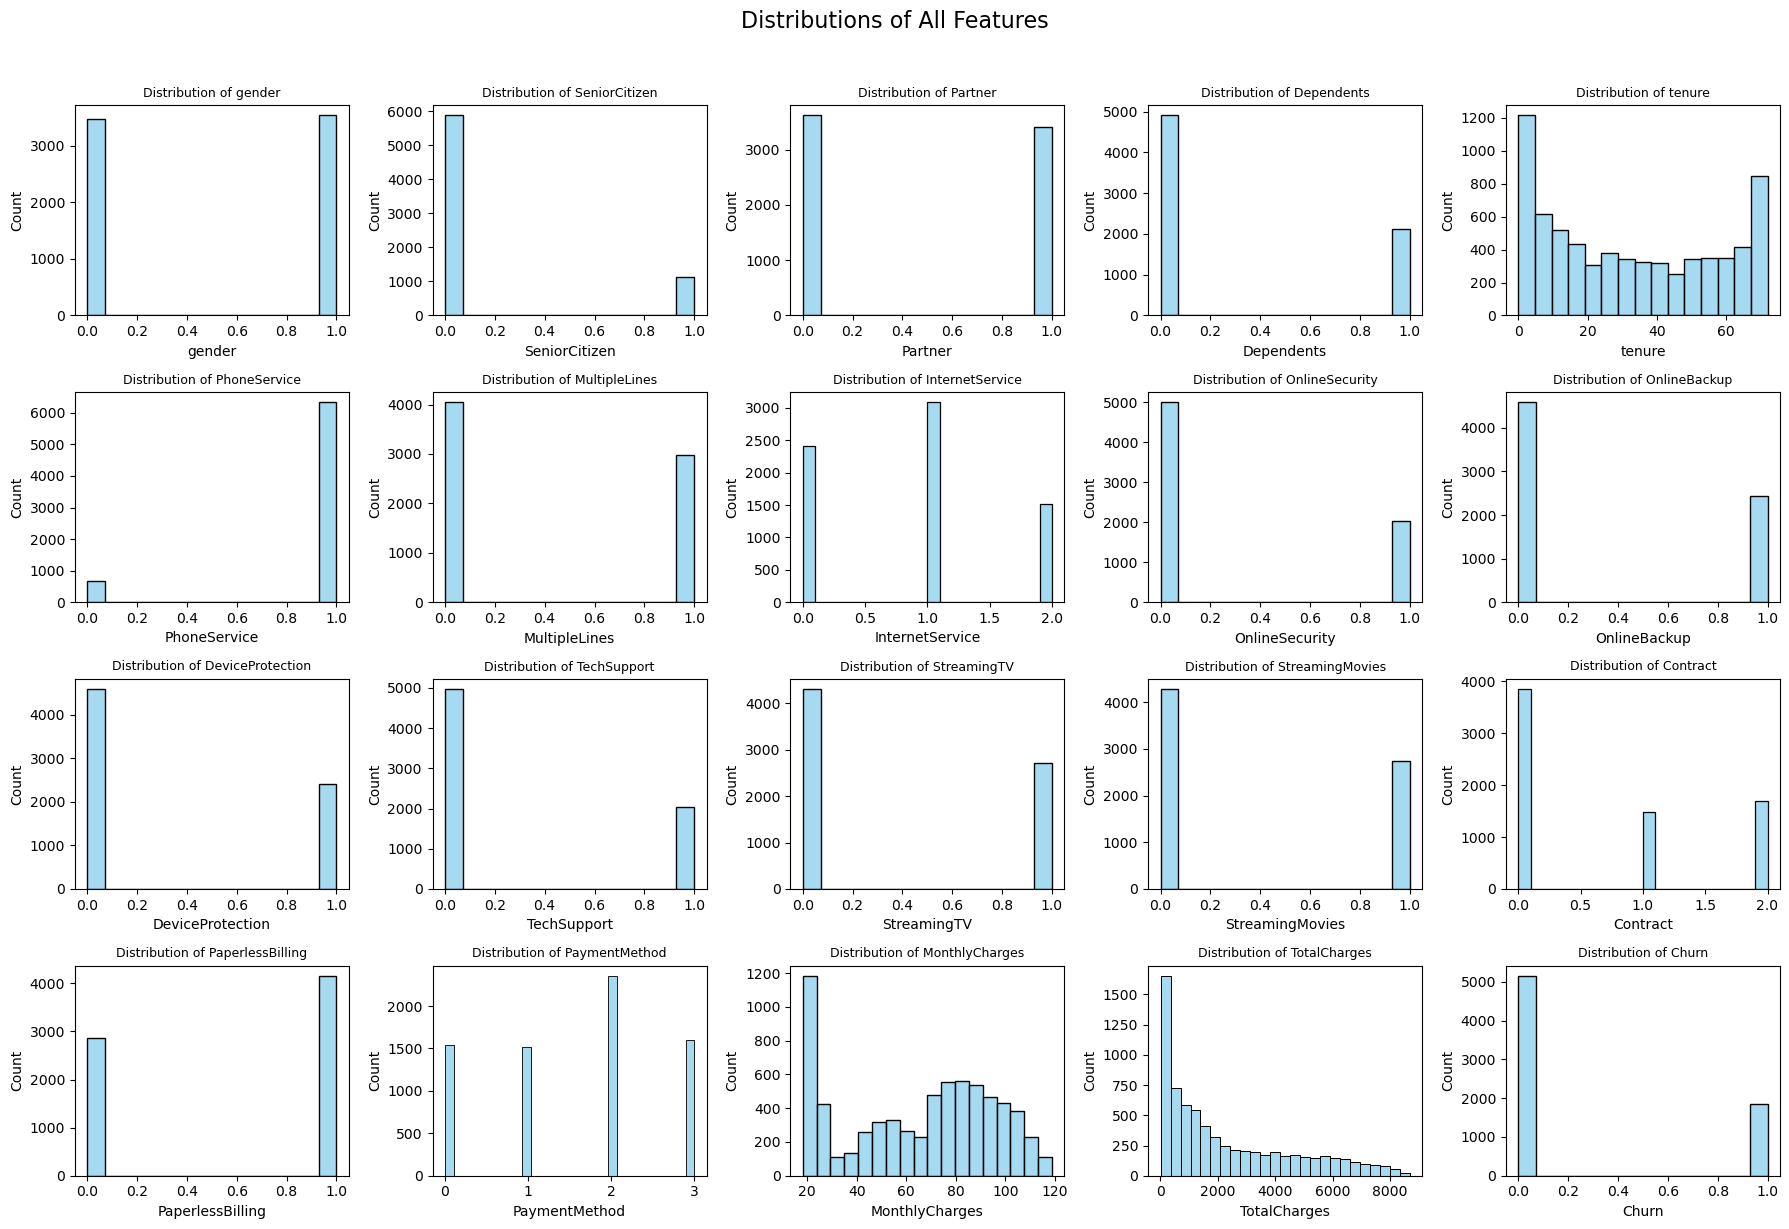

In [18]:
numerical_columns = df.select_dtypes(include=['number'])
plt.figure(figsize=(18, 12))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, idx)
    sns.histplot(df[col], kde=False, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=9)
    plt.tight_layout()
plt.suptitle("Distributions of All Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

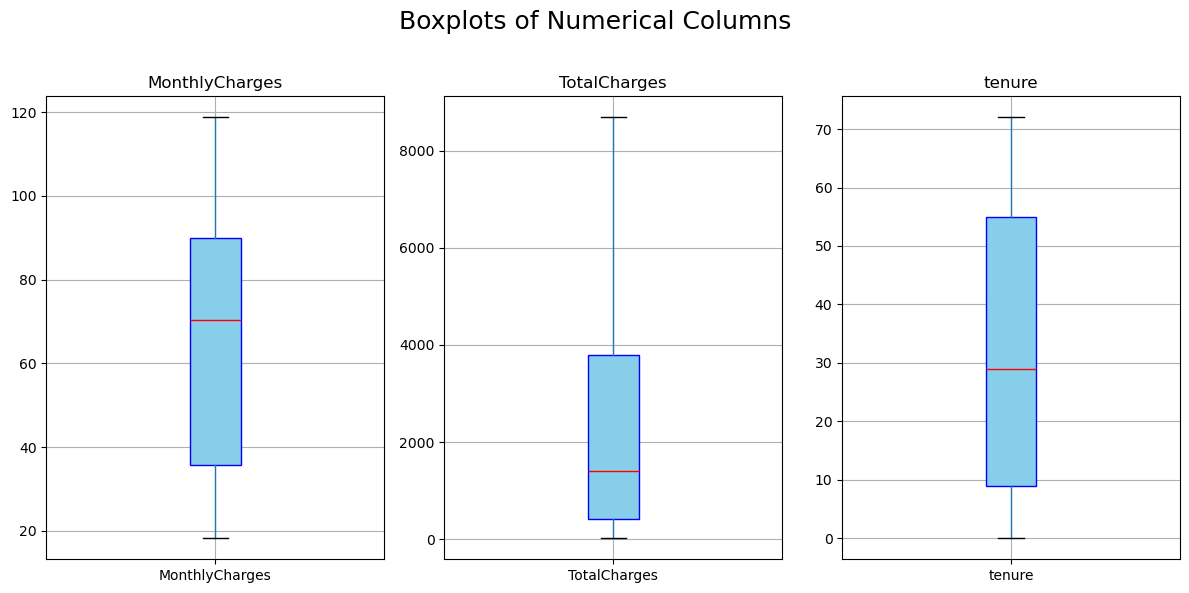

In [19]:
numerical_columns = df[['MonthlyCharges', 'TotalCharges', 'tenure']].columns
plt.figure(figsize=(12, 6))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
                 medianprops=dict(color='red'))
    plt.title(col, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

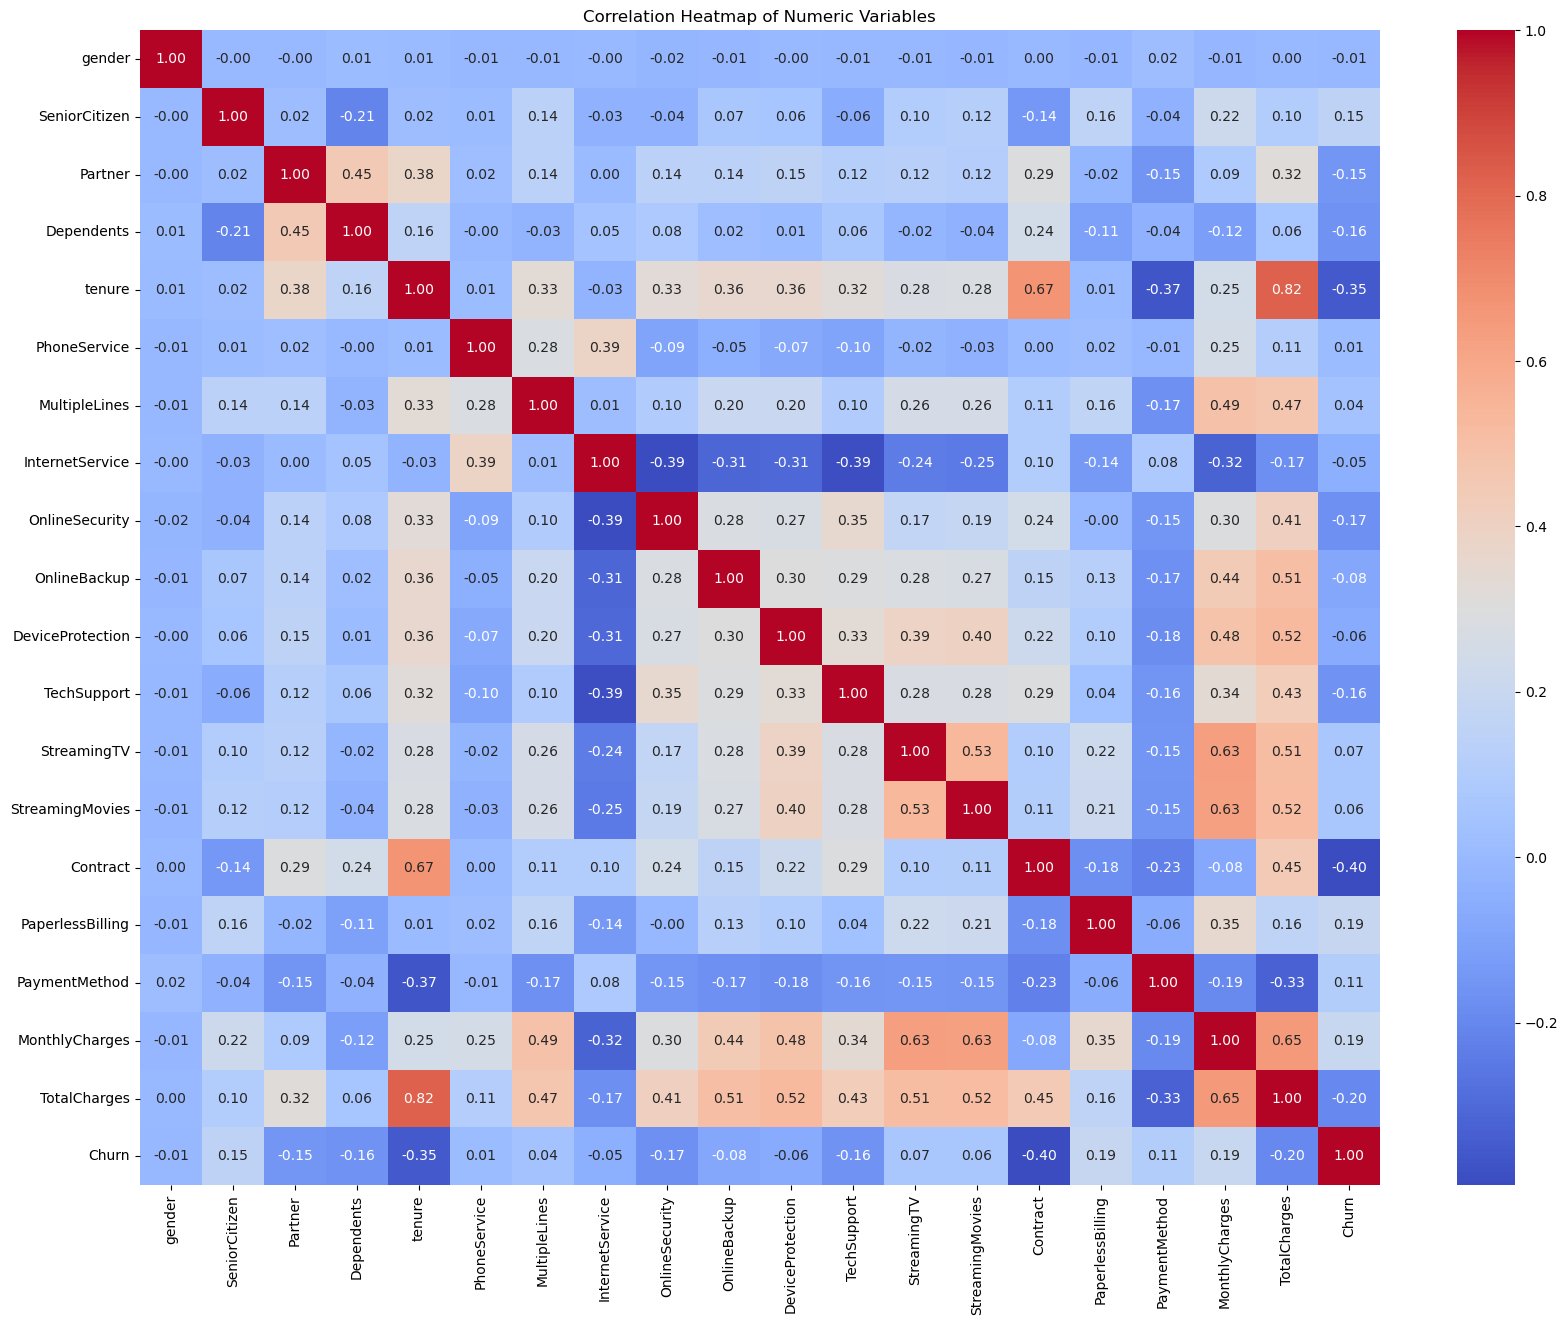

In [20]:
numeric_data = df.select_dtypes(include=['number', 'bool'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

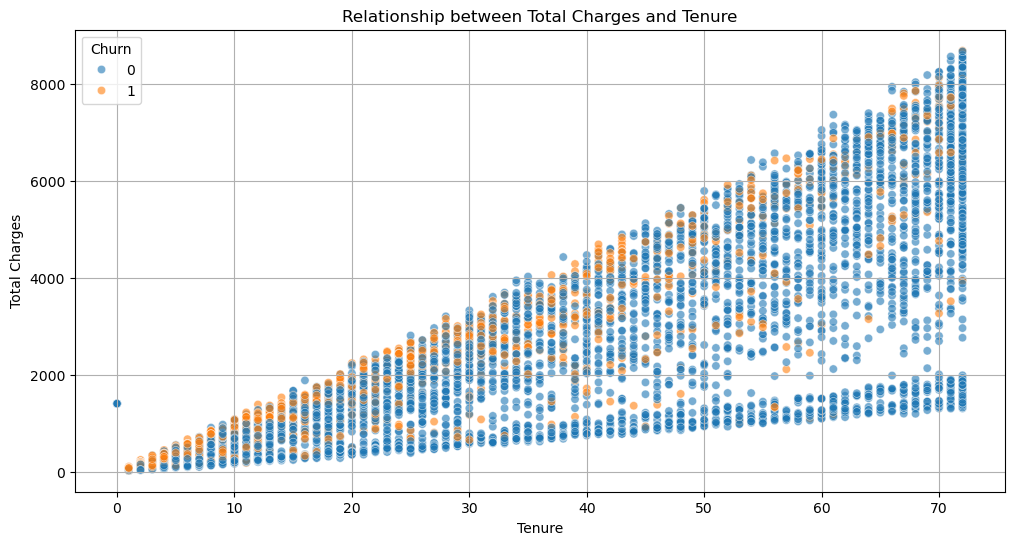

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', alpha=0.6)
plt.title('Relationship between Total Charges and Tenure')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.legend(title='Churn', loc='upper left')
plt.grid(True)
plt.show()

## Splitting Data and Handling Class Imbalance

In this section, we prepare the dataset for training and handle the class imbalance issue.

### 🧹 Steps:

- **Feature and Target Selection**:
  - `X` contains the features (excluding `gender`, `Churn`, `PhoneService` as they were either redundant or not informative).
  - `y` contains the target variable `Churn`.

- **Train-Test Split**:
  - Split the dataset into training and testing sets using an 80-20 ratio.
  - Set a fixed `random_state` for reproducibility.

- **Handling Class Imbalance**:
  - Applied **Random OverSampling (ROS)** on the training data to balance the number of samples between the churned and non-churned classes.

- **Feature Scaling**:
  - Used `StandardScaler` to normalize the feature values.
  - Scaling improves model performance, especially for distance-based algorithms like KNN and SVM.

This ensures the models are trained on balanced and standardized data, leading to more reliable predictions.


In [22]:
X = df.drop(['gender', 'Churn', 'PhoneService'], axis=1)
y = df['Churn']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=138)

In [24]:
ros = RandomOverSampler(random_state=42, sampling_strategy=0.5)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Boosting Classifier (XGBoost)

In this section, we apply the **XGBoost** algorithm, which is an efficient and scalable implementation of gradient boosting.

### 🔧 Model Configuration:
- **Hyperparameters**:
  - `max_depth`: The maximum depth of the tree, which controls model complexity.
  - `eta`: Learning rate, controls how much the model learns with each boosting round.
  - `colsample_bytree`: Fraction of features to be used for each tree, helping with regularization and avoiding overfitting.
  - `objective`: Set to `'binary:logistic'` because this is a binary classification problem (Churn vs. No Churn).

### 🚀 Model Training:
- The model is trained using the `xgb.train` method on the preprocessed training data (`dtrain`) and evaluated on the test set (`dtest`) with early stopping to prevent overfitting.

### 📊 Model Evaluation:
- **Accuracy**: The accuracy of the XGBoost model is computed and displayed.
- **Confusion Matrix**: A confusion matrix is plotted to visualize the performance of the classifier.
- **ROC Curve**: The ROC curve and the Area Under the Curve (AUC) are plotted to evaluate the model's classification ability.

These evaluations help us understand how well the model distinguishes between churned and non-churned customers.

In [26]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'max_depth': 10,
    'eta': 0.11,
    'colsample_bytree': 0.9,
    'scale_pos_weight': 0.61
}

bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dtest, 'test')],
                early_stopping_rounds=10, verbose_eval=10)

[0]	train-logloss:0.60521	test-logloss:0.54439
[10]	train-logloss:0.39932	test-logloss:0.41911
[20]	train-logloss:0.32146	test-logloss:0.39946
[30]	train-logloss:0.28247	test-logloss:0.39683
[37]	train-logloss:0.26556	test-logloss:0.39843


In [27]:
preds_xgb = bst.predict(dtest)
y_pred_xgb = [1 if x > 0.5 else 0 for x in preds_xgb]
xgb_accuracy  = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

XGBoost Accuracy: 82.35%


In [28]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      1035
           1       0.73      0.52      0.61       370

    accuracy                           0.82      1405
   macro avg       0.79      0.73      0.75      1405
weighted avg       0.81      0.82      0.81      1405



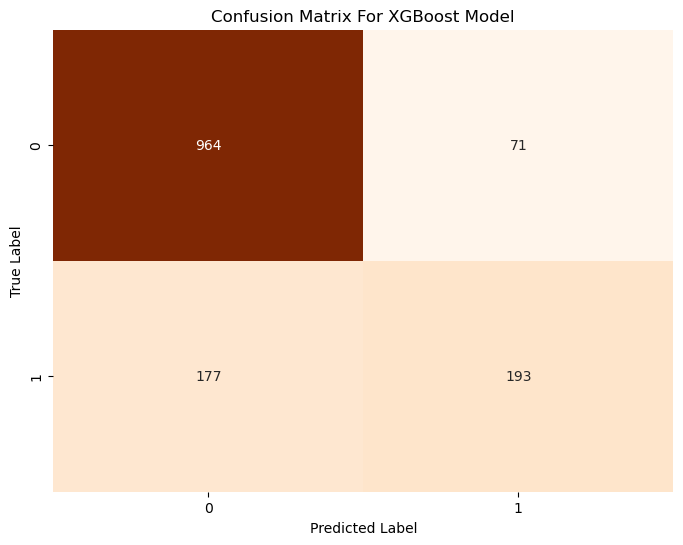

In [29]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix For XGBoost Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

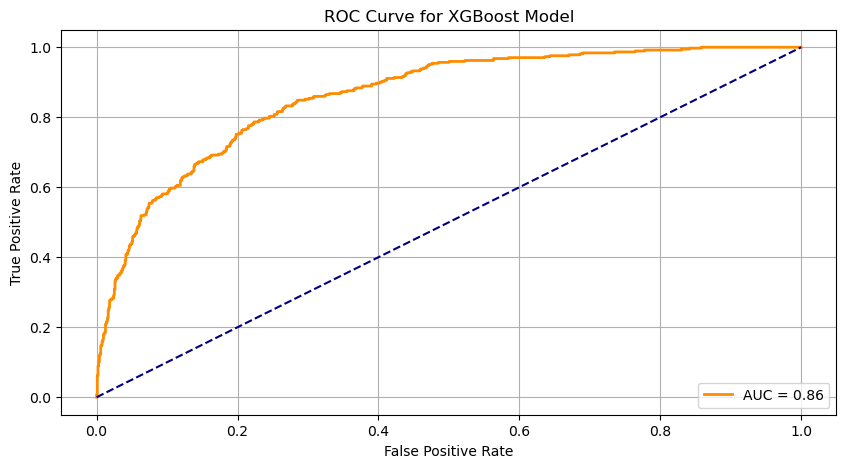

In [30]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, preds_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(10, 5))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'AUC = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Bagging Classifier

In this section, we apply the **Bagging Classifier**, which uses multiple instances of the same base classifier (in this case, a Decision Tree) to improve stability and accuracy.

### 🔧 Model Configuration:
- **Base Classifier (Decision Tree)**:
  - `max_depth`: The maximum depth of the tree, controlling model complexity.
  - `min_samples_split`: Minimum number of samples required to split an internal node.
  - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
  - `class_weight='balanced'`: Helps handle class imbalance by adjusting weights inversely proportional to class frequencies.

- **Bagging Classifier**:
  - `n_estimators`: Number of base classifiers (150 in this case).
  - `random_state`: Ensures reproducibility of results.

### 🚀 Model Training:
- The model is trained on the resampled training data (`X_train`, `y_train`) using **Bagging** to reduce variance and prevent overfitting.

### 📊 Model Evaluation:
- **Accuracy**: The accuracy score of the Bagging model is computed and displayed.
- **Confusion Matrix**: A confusion matrix is plotted to visualize the performance of the classifier.
- **ROC Curve**: The ROC curve and AUC score are plotted to assess the model's ability to distinguish between classes.

Bagging helps improve the stability and accuracy of the base decision tree classifier, particularly in handling overfitting by averaging multiple models.


In [31]:
base_tree = DecisionTreeClassifier (
    max_depth=19,
    min_samples_split=3,
    min_samples_leaf=1,
    class_weight='balanced'
)

bagging_model = BaggingClassifier(
    estimator=base_tree,  
    n_estimators=150,    
    random_state=42
)

bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=19,
                                                   min_samples_split=3),
                  n_estimators=150, random_state=42)

In [32]:
y_pred_bagging = bagging_model.predict(X_test)
bagging_accuracy  = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {bagging_accuracy * 100:.2f}%")

Bagging Accuracy: 81.85%


In [33]:
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1035
           1       0.67      0.61      0.64       370

    accuracy                           0.82      1405
   macro avg       0.77      0.75      0.76      1405
weighted avg       0.81      0.82      0.82      1405



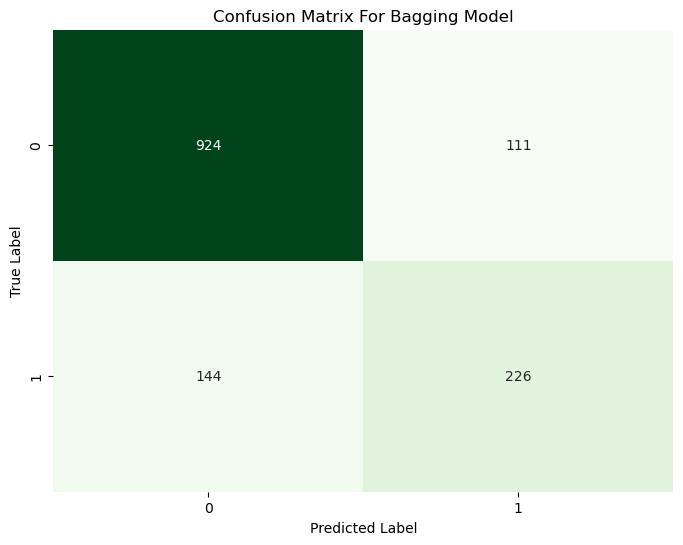

In [34]:
cm = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix For Bagging Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

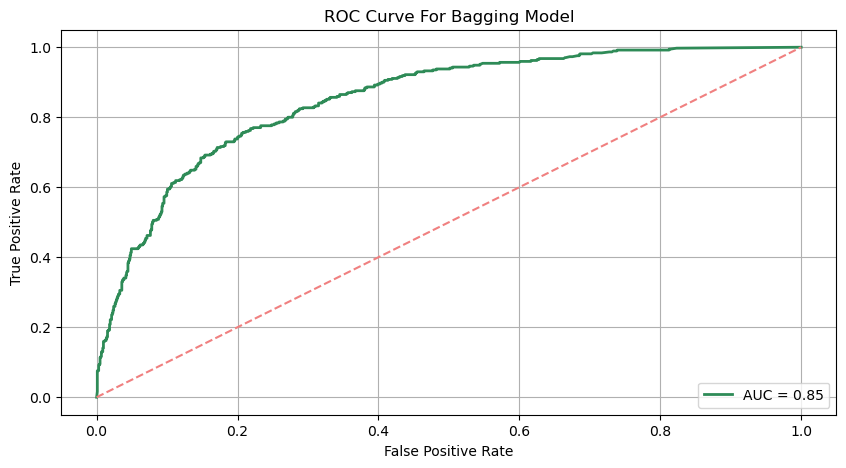

In [35]:
y_probs_bagging = bagging_model.predict_proba(X_test)[:, 1]
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, y_probs_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)
plt.figure(figsize=(10, 5))
plt.plot(fpr_bagging, tpr_bagging, color='seagreen', lw=2, label=f'AUC = {roc_auc_bagging:.2f}')
plt.plot([0, 1], [0, 1], color='lightcoral', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Bagging Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Stacking Classifier

In this section, we apply the **Stacking Classifier**, which combines multiple base models (a decision tree, k-NN, and SVC) with a final meta-learner to improve performance.

### 🔧 Model Configuration:
- **Base Models**:
  - **Bagging Classifier**: An ensemble of decision trees using Bagging, with 150 estimators and balanced class weights.
  - **K-Nearest Neighbors (KNN)**: A simple KNN classifier with `n_neighbors=2`.
  - **Support Vector Classifier (SVC)**: A linear SVC with balanced class weights.

- **Meta-Learner**:
  - A **Logistic Regression** model is used as the meta-learner to combine the predictions from the base models.

- **Stacking Classifier**:
  - `passthrough=True`: Allows the base models' features to be passed along to the meta-learner for additional learning.
  - `cv=2`: Cross-validation split to evaluate the model during training.

### 🚀 Model Training:
- The model is trained on the training data (`X_train`, `y_train`) using **Stacking** to combine the predictions of multiple base classifiers and improve generalization.

### 📊 Model Evaluation:
- **Accuracy**: The accuracy score of the Stacking model is computed and displayed.
- **Confusion Matrix**: A confusion matrix is plotted to visualize the performance of the classifier.
- **ROC Curve**: The ROC curve and AUC score are plotted to assess the model's classification ability.

Stacking Classifier leverages the strengths of multiple classifiers to achieve better predictive performance, especially when the base models have complementary strengths.


In [36]:
base_models = [
    ('bagging', bagging_model),  
    ('knn', KNeighborsClassifier(n_neighbors=2)),                 
    ('svc', LinearSVC(random_state=42, dual='auto', class_weight='balanced'))
]

meta_learner = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=base_models,  
    final_estimator=meta_learner,  
    passthrough=True,  
    cv=2,
)

stacking_model.fit(X_train, y_train)

StackingClassifier(cv=2,
                   estimators=[('bagging',
                                BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                   max_depth=19,
                                                                                   min_samples_split=3),
                                                  n_estimators=150,
                                                  random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=2)),
                               ('svc',
                                LinearSVC(class_weight='balanced', dual='auto',
                                          random_state=42))],
                   final_estimator=LogisticRegression(), passthrough=True)

In [37]:
y_pred_stacking = stacking_model.predict(X_test)
stacking_accuracy  = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Accuracy: {stacking_accuracy * 100:.2f}%")

Stacking Accuracy: 82.42%


In [38]:
print(classification_report(y_test, y_pred_stacking))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1035
           1       0.69      0.61      0.65       370

    accuracy                           0.82      1405
   macro avg       0.78      0.76      0.76      1405
weighted avg       0.82      0.82      0.82      1405



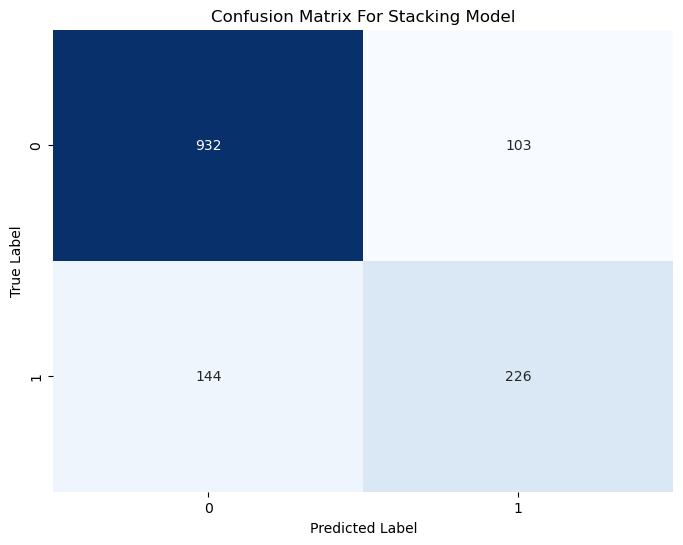

In [39]:
cm = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix For Stacking Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

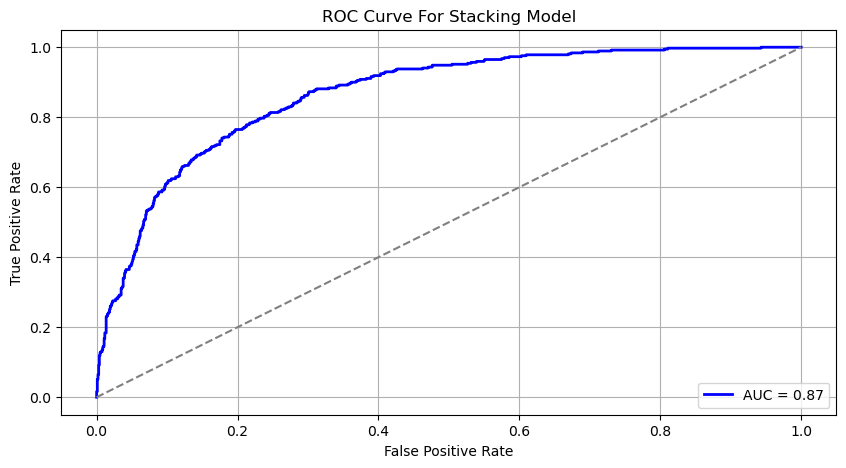

In [40]:
y_probs_stacking = stacking_model.predict_proba(X_test)[:, 1]
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_probs_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
plt.figure(figsize=(10, 5))
plt.plot(fpr_stacking, tpr_stacking, color='blue', lw=2, label=f'AUC = {roc_auc_stacking:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Stacking Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Model Comparison

In this section, we compare the performance of the three ensemble models (XGBoost, Bagging, and Stacking) using multiple evaluation metrics:

### 1. **ROC Curve Comparison**:
We plot the **Receiver Operating Characteristic (ROC)** curve for each model to visually compare their performance:
- **XGBoost** is represented in dark orange.
- **Bagging** is represented in green.
- **Stacking** is represented in blue.
The **AUC (Area Under the Curve)** is also displayed in the legend for each model, which indicates the model's ability to distinguish between the positive and negative classes. A higher AUC value signifies better performance.

### 2. **Precision-Recall Curve Comparison**:
Precision-Recall curves are plotted to evaluate how well each model performs in terms of precision and recall:
- **XGBoost** is represented in orange.
- **Bagging** is represented in green.
- **Stacking** is represented in blue.
The **Precision-Recall Curve** is especially useful in imbalanced datasets to assess the model's ability to correctly identify the minority class.

### 3. **Accuracy Comparison**:
Finally, a bar chart is used to compare the **accuracy scores** of all three models:
- XGBoost
- Bagging
- Stacking

This provides an easy-to-read comparison of how well each model performed in terms of overall accuracy.


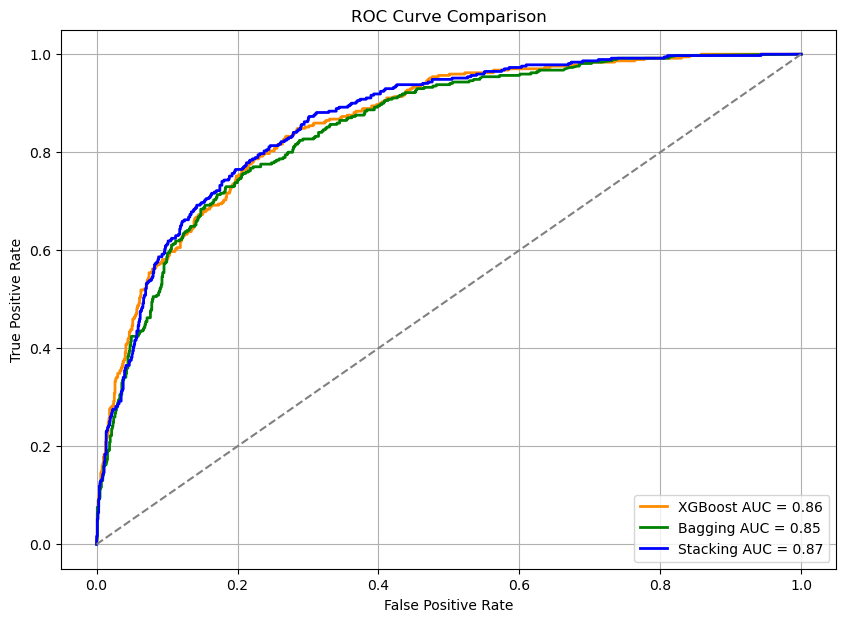

In [41]:
plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost AUC = {roc_auc_xgb:.2f}')
plt.plot(fpr_bagging, tpr_bagging, color='green', lw=2, label=f'Bagging AUC = {roc_auc_bagging:.2f}')
plt.plot(fpr_stacking, tpr_stacking, color='blue', lw=2, label=f'Stacking AUC = {roc_auc_stacking:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

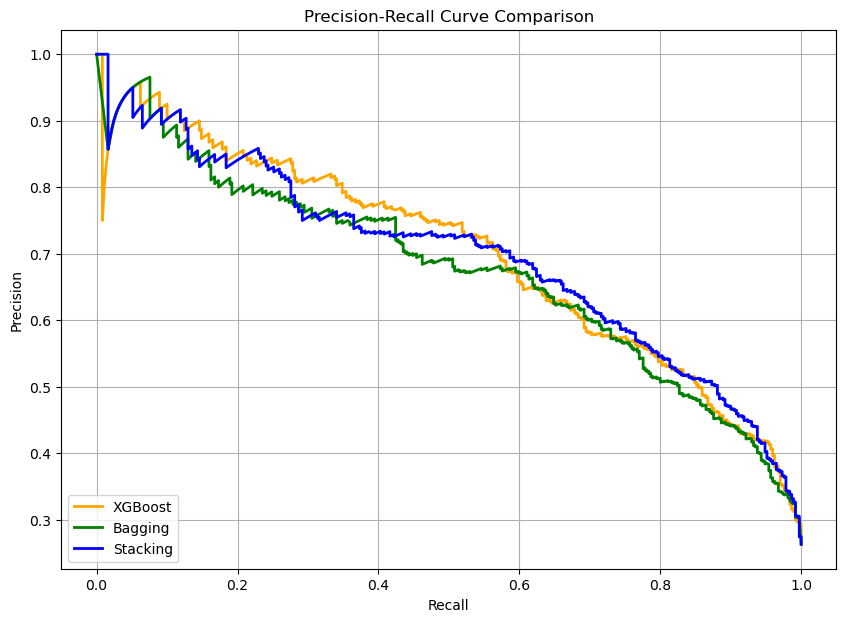

In [42]:
precision1, recall1, _ = precision_recall_curve(y_test, preds_xgb)
precision2, recall2, _ = precision_recall_curve(y_test, y_probs_bagging)
precision3, recall3, _ = precision_recall_curve(y_test, y_probs_stacking)
plt.figure(figsize=(10, 7))
plt.plot(recall1, precision1, color='orange', lw=2, label=f'XGBoost')
plt.plot(recall2, precision2, color='green', lw=2, label=f'Bagging')
plt.plot(recall3, precision3, color='blue', lw=2, label=f'Stacking')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.grid()
plt.show()

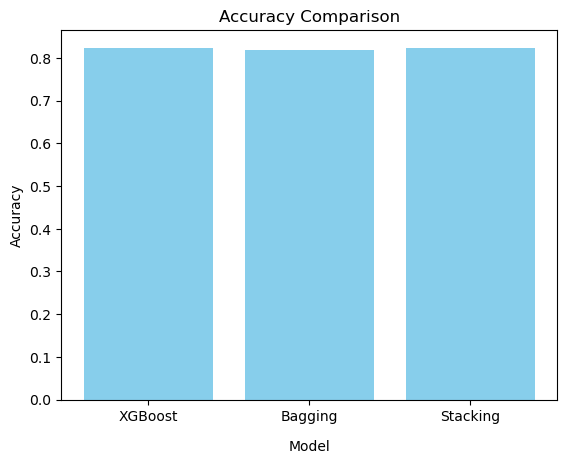

In [43]:
models = ['XGBoost', 'Bagging', 'Stacking']
accuracy_scores = [xgb_accuracy, bagging_accuracy, stacking_accuracy]
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Model', labelpad=12)  
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()